# **NLP_&_INSURANCE: TEXT_ANALYSIS**

![](https://miro.medium.com/max/3310/1*2uLP1885m7LG9f638JlLGQ.png)

## Import Libraries

In [1]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 3.2 MB/s 
     |████████████████████████████████| 88 kB 4.6 MB/s 
     |████████████████████████████████| 5.2 MB 53.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 79 kB 8.7 MB/s 
     |████████████████████████████████| 4.2 MB 53.1 MB/s 
     |████████████████████████████████| 1.2 MB 56.1 MB/s 
     |████████████████████████████████| 86 kB 6.9 MB/s 
     |████████████████████████████████| 6.6 MB 56.6 MB/s 
     |████████████████████████████████| 636 kB 56.8 MB/s 
     |████████████████████████████████| 1.1 MB 57.8 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342163 sha256=a3140a3efe3abb0e10ecb55b05426fa13bef01b55a89d5282f57a8e29db49b54
  Stored in directory: /root/.cache/p

In [2]:
!pip install bertopic[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#setup deterministic results 
import numpy as np
from numpy.random import seed
seed=0
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import os
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import re
import string
#import langdetect 
#import ktrain
#from ktrain import text
import spacy
import gensim
from gensim.models import Word2Vec 
import gensim.downloader as gensim_api
from bertopic import BERTopic

## Requirements

In [4]:
print(np.__version__) 

1.21.6


In [5]:
print(pd.__version__) 

1.3.5


In [6]:
print(sklearn.__version__)

1.0.2


In [7]:
print(sns.__version__)

0.11.2


In [8]:
print(tf.__version__)

2.8.2


In [9]:
print(spacy.__version__)

2.2.4


In [10]:
print(gensim.__version__)

3.6.0


## Upload dataset

In [11]:
# https://www.kaggle.com/competitions/nlp-getting-started

In [12]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/claudio1975/SWISSTEXT_2022/main/data/train_clean.csv')

In [13]:
#from google.colab import files 
#uploaded = files.upload() 

In [14]:
# Reading File
#df_2 = pd.read_csv('train_clean.csv')

In [15]:
# select columns
df_2 = df_2[['id','keyword','location','text','target','lang']]
df_2.head()

,id,keyword,location,text,target,lang
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,en
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,en
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,en
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,en
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,en


## Named Entity Recognition (NER) and Part of Speech Tagging (POS)

In [16]:
nlp = spacy.load("en_core_web_sm")

In [17]:
ner_lst = nlp.pipe_labels['ner']
print(len(ner_lst))
print(ner_lst)

18
['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']


In [18]:
# tag text cleaned
txt = df_2["text"].iloc[5]
doc_cleaned = nlp(txt)
# display result
#spacy.displacy.render(doc_cleaned, style="ent")
print(txt)
print([(X.text, X.label_) for X in doc_cleaned.ents])

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
[('RockyFire', 'PERSON'), ('California Hwy', 'ORG'), ('20', 'CARDINAL'), ('Lake County', 'GPE')]


In [19]:
print(f"{'text':{15}} {'NER':{10}} {'NER explained':{20}} ")
for ent in doc_cleaned.ents:
  print(f'{ent.text:{15}} {ent.label_:{10}} {spacy.explain(ent.label_):{20}}')

text            NER        NER explained        
RockyFire       PERSON     People, including fictional
California Hwy  ORG        Companies, agencies, institutions, etc.
20              CARDINAL   Numerals that do not fall under another type
Lake County     GPE        Countries, cities, states


In [20]:
tag_lst = nlp.pipe_labels['tagger']
print(len(tag_lst))
print(tag_lst)

50
['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NFP', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'XX', '_SP', '``']


In [21]:
print(txt)
print([(X.text, X.pos_, X.tag_) for X in doc_cleaned])

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
[('#', 'PROPN', 'NNP'), ('RockyFire', 'PROPN', 'NNP'), ('Update', 'PROPN', 'NNP'), ('=', 'PUNCT', 'NFP'), ('>', 'X', 'XX'), ('California', 'PROPN', 'NNP'), ('Hwy', 'PROPN', 'NNP'), ('.', 'PUNCT', '.'), ('20', 'NUM', 'CD'), ('closed', 'VERB', 'VBD'), ('in', 'ADP', 'IN'), ('both', 'DET', 'DT'), ('directions', 'NOUN', 'NNS'), ('due', 'ADJ', 'JJ'), ('to', 'ADP', 'IN'), ('Lake', 'PROPN', 'NNP'), ('County', 'PROPN', 'NNP'), ('fire', 'NOUN', 'NN'), ('-', 'PUNCT', 'HYPH'), ('#', 'NOUN', 'NN'), ('CAfire', 'NUM', 'CD'), ('#', 'NOUN', 'NN'), ('wildfires', 'NOUN', 'NNS')]


In [22]:
print(f"{'text':{10}} {'POS':{10}} {'TAG':{10}} {'POS explained':{20}} {'tag explained'} ")
for token in doc_cleaned:
  print(f'{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.pos_):{20}} {spacy.explain(token.tag_)}')

text       POS        TAG        POS explained        tag explained 
#          PROPN      NNP        proper noun          noun, proper singular
RockyFire  PROPN      NNP        proper noun          noun, proper singular
Update     PROPN      NNP        proper noun          noun, proper singular
=          PUNCT      NFP        punctuation          superfluous punctuation
>          X          XX         other                unknown
California PROPN      NNP        proper noun          noun, proper singular
Hwy        PROPN      NNP        proper noun          noun, proper singular
.          PUNCT      .          punctuation          punctuation mark, sentence closer
20         NUM        CD         numeral              cardinal number
closed     VERB       VBD        verb                 verb, past tense
in         ADP        IN         adposition           conjunction, subordinating or preposition
both       DET        DT         determiner           determiner
directions NOUN      

## Text pre-processing

In [23]:
def lemmatizer(text):        
    lem = []
    doc = nlp(text)
    for word in doc:
        lem.append(word.lemma_)
    return " ".join(lem)
def clean_text(text):
    # Normalize Text
    text = text.lower()
    # Remove Unicode Characters
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", '',text)
    # Remove Punctuaction
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text) 
    # Remove Stopwords
    all_stop_words = nlp.Defaults.stop_words
    text = " ".join([word for word in str(text).split() if word not in all_stop_words])
    # Lemmatization
    text = lemmatizer(text)
    text = re.sub(r'-PRON-', '',text)
    return text


In [24]:
i=3
df_cleaned = pd.DataFrame(df_2.apply(lambda x: clean_text(x.iloc[i]), axis=1), columns = ['text_cleaned'])


In [25]:
df_3 = pd.concat([df_2, df_cleaned], axis=1)
df_3.head()

,id,keyword,location,text,target,lang,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,en,deeds reason earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,en,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,en,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,en,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,en,get send photo ruby alaska smoke wildfires pou...


In [26]:
df_3['text'][5]


'#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'

In [27]:
df_3['text_cleaned'][5]

'rockyfire update california hwy close directions lake county fire cafire wildfire'

## N-Grams

In [28]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,1),                      # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})',  # num chars >= 5
                          min_df=2).fit(corpus)                   # minimum required occurences of a word      
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_3['text_cleaned'], 20)
df_uni = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

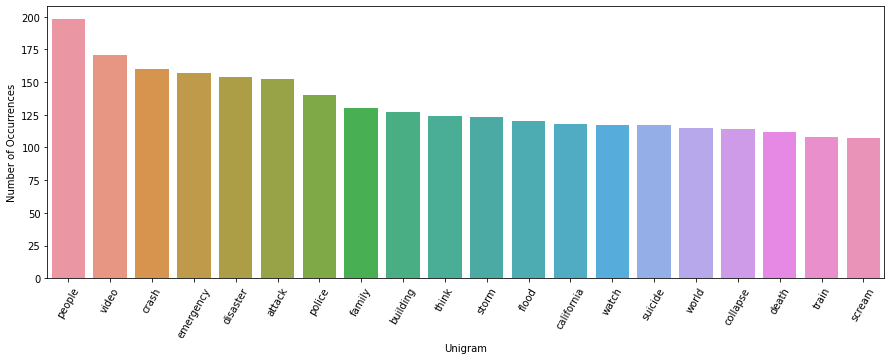

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_uni['unigram'], y=df_uni['count'])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Unigram', fontsize=10)
plt.xticks(rotation=60)
plt.show()

In [30]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2),                      # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})',  # num chars >= 5
                          min_df=2).fit(corpus)                   # minimum required occurences of a word      
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_3['text_cleaned'], 20)
df_bi = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

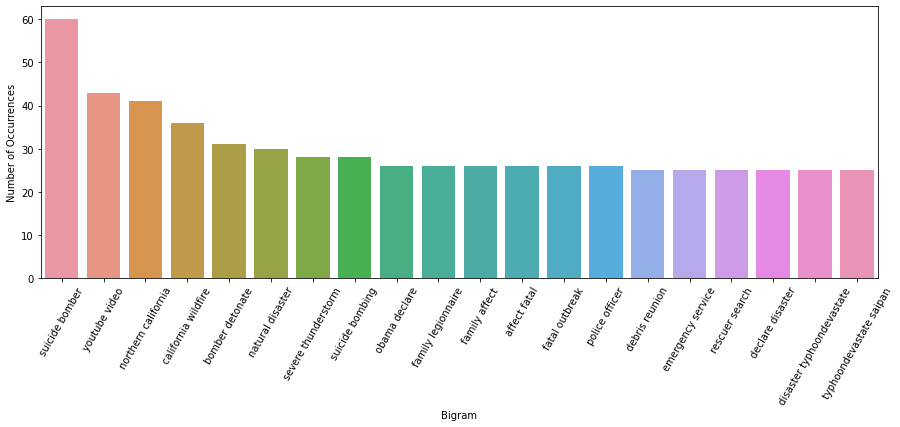

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_bi['bigram'], y=df_bi['count'])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Bigram', fontsize=10)
plt.xticks(rotation=60)
plt.show()

In [32]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3),                     # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})', # num chars >= 5
                          min_df=2).fit(corpus)                  # minimum required occurences of a word      
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_3['text_cleaned'], 20)
df_tri = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

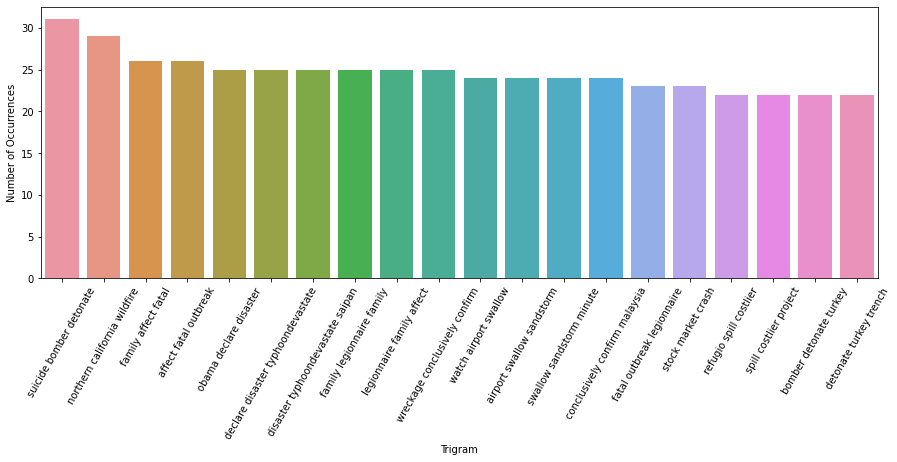

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_tri['trigram'], y=df_tri['count'])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Trigram', fontsize=10)
plt.xticks(rotation=60)
plt.show()

## Topic Modelling with BertTopic

In [34]:
tfidf = TfidfVectorizer(ngram_range=(1,1),                       # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})', # num chars >= 5
                          min_df=2).fit(df_3['text_cleaned'])    # minimum required occurences of a word      

In [35]:
model = BERTopic(nr_topics=10,
    vectorizer_model=tfidf,
    calculate_probabilities=True,
    verbose=True)
topics, probs = model.fit_transform(df_3['text_cleaned'])

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/238 [00:00<?, ?it/s]

2022-06-02 14:08:57,815 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-06-02 14:09:34,583 - BERTopic - Reduced dimensionality
2022-06-02 14:09:46,965 - BERTopic - Clustered reduced embeddings
2022-06-02 14:09:48,380 - BERTopic - Reduced number of topics from 188 to 11


In [36]:
freq = model.get_topic_info()
freq.head()

,Topic,Count,Name
0,-1,5931,-1_disaster_building_nuclear_wildfire
1,0,229,0_accident_crash_ambulance_airplane
2,1,206,1_thunderstorm_severe_calgary_thunder
3,2,187,2_bioterror_emergency_transport_chemical
4,3,181,3_sinkhole_swallow_smoke_minute


In [37]:
model.get_topic(4)

[('demolish', 0.11772902394654515),
 ('attack', 0.10728790254502368),
 ('arson', 0.0984870455552076),
 ('militant', 0.089280701432384),
 ('terrorist', 0.08714309723644621),
 ('temple', 0.08157124375597948),
 ('pamela', 0.07809792243181253),
 ('muslims', 0.07776207922054766),
 ('christian', 0.07759625068098973),
 ('mount', 0.0774317875802243)]

In [38]:
model.visualize_barchart()

In [39]:
tfidf_2 = TfidfVectorizer(ngram_range=(2,2),                      # n_gram_type
                          token_pattern= r'([a-zA-Z0-9-/]{5,})',  # num chars >= 5
                          min_df=2).fit(df_3['text_cleaned'])     # minimum required occurences of a word   

In [40]:
model_2 = BERTopic(nr_topics=10,
    vectorizer_model=tfidf_2,
    calculate_probabilities=True,
    verbose=True)
topics, probs = model_2.fit_transform(df_3['text_cleaned'])

Batches:   0%|          | 0/238 [00:00<?, ?it/s]

2022-06-02 14:09:53,900 - BERTopic - Transformed documents to Embeddings
2022-06-02 14:10:12,733 - BERTopic - Reduced dimensionality
2022-06-02 14:10:24,772 - BERTopic - Clustered reduced embeddings
2022-06-02 14:10:26,130 - BERTopic - Reduced number of topics from 184 to 11


In [41]:
freq = model_2.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,4888,-1_youtube video_natural disaster_rescuer sear...
1,0,430,0_northern california_sound alarm_cause damage...
2,1,324,1_animal rescue_whirlwind whirlwind_heart atta...
3,2,316,2_police officer_desolation smaug_hobbit desol...
4,3,281,3_drown drown_emergency service_tropical cyclo...
5,4,255,4_nuclear reactor_world collide_explode explod...
6,5,242,5_severe thunderstorm_thunderstorm warning_iss...
7,6,230,6_panic attack_reason woman_emotional wreck_pa...
8,7,222,7_landslide landslide_think would_hurricane gu...
9,8,215,8_freak accident_flash flood_train collide_mil...


In [42]:
model_2.get_topic(4)

[('nuclear reactor', 0.6211449009057177),
 ('world collide', 0.3082263354130516),
 ('explode explode', 0.2562200336208915),
 ('explode internet', 0.17870710289688044),
 ('check awesome', 0.0760352780636535),
 ('death metal', 0.0760352780636535),
 ('demolish think', 0.0760352780636535),
 ('ahead nuclear', 0.0760352780636535),
 ('internet explode', 0.0760352780636535),
 ('fucking thing', 0.0760352780636535)]

In [43]:
model_2.visualize_barchart()

In [44]:
tfidf_3 = TfidfVectorizer(ngram_range=(1,3),                      # n_gram_type
                          token_pattern = r'([a-zA-Z0-9-/]{4,})', # num chars >= 4
                          min_df=2).fit(df_3['text_cleaned'])     # minimum required occurences of a word   

In [45]:
model_3 = BERTopic(nr_topics=10,
    vectorizer_model=tfidf_3,
    calculate_probabilities=True,
    verbose=True)
topics, probs = model_3.fit_transform(df_3['text_cleaned'])

Batches:   0%|          | 0/238 [00:00<?, ?it/s]

2022-06-02 14:10:31,121 - BERTopic - Transformed documents to Embeddings
2022-06-02 14:10:50,239 - BERTopic - Reduced dimensionality
2022-06-02 14:11:02,203 - BERTopic - Clustered reduced embeddings
2022-06-02 14:11:04,091 - BERTopic - Reduced number of topics from 195 to 11


In [46]:
freq = model_3.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,6276,-1_fire_body_burn_scream
1,0,226,0_youtube_video_youtube video_like youtube video
2,1,183,1_hostage_collapse_loud_bang
3,2,124,2_emergency_calgary_plan_chemical
4,3,124,3_suicide_suicide bomber_bomber_detonate
5,4,121,4_train_derailment_derail_train derail
6,5,114,5_spill_demolish_project_demolition
7,6,113,6_accident_airplane_collision_traffic
8,7,111,7_nuclear_disaster_reactor_nuclear reactor
9,8,111,8_hiroshima_atomic_anniversary_japan


In [47]:
model_3.get_topic(4)

[('train', 0.2112636673763099),
 ('derailment', 0.1720931262124339),
 ('derail', 0.16686701985940938),
 ('train derail', 0.10375562861993834),
 ('horror', 0.10273281772360099),
 ('tragedy', 0.07968359624405401),
 ('save life', 0.07284344255081282),
 ('coach', 0.07170168570704549),
 ('metro', 0.06638792499101216),
 ('youth', 0.06443083659055619)]

In [48]:
model_3.visualize_barchart()

### Word Embedding

In [49]:
def tokenize(sentence):
  sentence = str(sentence).replace("\n", " ")
  token = nlp(sentence)
  tokens = [w.text for w in token]
  # remove short tokens
  tokens = [t for t in tokens if len(t) > 4]
  return tokens

In [50]:
data = df_3['text_cleaned'].apply(tokenize)
def vocabulary(doc):        
    corpus = []
    for word in doc:
        corpus.append(word)
    return corpus

In [51]:
corpus = vocabulary(data)

In [52]:
def similar(model, word):
    return model.wv.most_similar(word) 

def embedding(model, word):
    return model.wv[word]

def similarity(model, word1, word2):
    return model.wv.similarity(word1, word2)

## CBOW Model

![](https://media.geeksforgeeks.org/wp-content/uploads/cbow-1.png)

In [53]:
# Create CBOW model
model_cbow = Word2Vec(corpus, min_count = 50)

In [54]:
print(model_cbow)

Word2Vec(vocab=99, size=100, alpha=0.025)


In [55]:
# summarize vocabulary
words = list(model_cbow.wv.vocab)
print(words)

['earthquake', 'forest', 'evacuation', 'people', 'wildfire', 'california', 'photo', 'smoke', 'school', 'update', 'flood', 'disaster', 'cause', 'emergency', 'happen', 'building', 'damage', 'crash', 'break', 'police', 'thank', 'leave', 'black', 'train', 'truck', 'accident', 'great', 'report', 'cross', 'injury', 'right', 'change', 'today', 'issue', 'scream', 'youtube', 'thing', 'debris', 'family', 'state', 'wreck', 'death', 'house', 'service', 'destroy', 'think', 'weather', 'world', 'attack', 'survive', 'watch', 'start', 'video', 'movie', 'storm', 'would', 'collapse', 'military', 'japan', 'charge', 'northern', 'nuclear', 'suicide', 'injure', 'obama', 'weapon', 'release', 'woman', 'atomic', 'flame', 'hostage', 'wound', 'drown', 'panic', 'hiroshima', 'bombing', 'rescue', 'explode', 'evacuate', 'confirm', 'content', 'water', 'casualty', 'collide', 'thunderstorm', 'fatal', 'crush', 'legionnaire', 'malaysia', 'deluge', 'demolish', 'derail', 'detonate', 'electrocute', 'reddit', 'fatality', 'obl

In [56]:
similar(model_cbow, 'wildfire')

[('deluge', 0.23658236861228943),
 ('injure', 0.225150465965271),
 ('demolish', 0.2155238389968872),
 ('japan', 0.19376115500926971),
 ('california', 0.1783505082130432),
 ('fatality', 0.17745602130889893),
 ('youtube', 0.1719888150691986),
 ('cause', 0.16759690642356873),
 ('military', 0.16687627136707306),
 ('content', 0.15778830647468567)]

In [57]:
embedding(model_cbow, 'wildfire')

array([ 2.2666526e-03, -2.9821098e-03,  3.3737689e-03,  2.4725164e-03,
        2.1313464e-03, -4.5294240e-03,  6.7952496e-04,  2.4099904e-03,
        8.3434733e-04,  3.2920637e-03, -7.8388490e-04,  1.7464097e-03,
       -1.7171240e-03,  5.0683958e-03,  1.8409234e-03, -2.8219710e-03,
       -4.3027140e-03, -1.9770707e-03,  1.9452516e-03, -1.9059754e-03,
       -1.9128477e-03,  2.3119650e-03, -7.0190092e-04, -5.2544549e-03,
        6.5302168e-04,  3.6570786e-03, -2.9749433e-03, -4.6553221e-03,
       -3.1287021e-03, -2.5812720e-03, -4.2999606e-03, -5.4351085e-06,
       -2.7446798e-03, -5.5180248e-03, -1.7579263e-03,  3.0749713e-04,
       -3.8977959e-03,  1.1221364e-03, -3.1494014e-03,  3.1572948e-03,
        2.2736357e-03, -5.0817272e-03,  2.6861459e-03, -1.7973357e-03,
       -4.1910880e-03,  3.2248385e-03, -4.4703245e-04, -3.0033307e-03,
       -4.5977836e-03, -3.3094396e-03,  3.9643387e-04,  2.2299716e-03,
       -2.0986712e-03, -4.2839563e-03, -3.4317733e-03,  1.5143537e-03,
      

In [58]:
similarity(model_cbow, 'wildfire', "california")

0.1783505

In [59]:
X = model_cbow[model_cbow.wv.vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [60]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

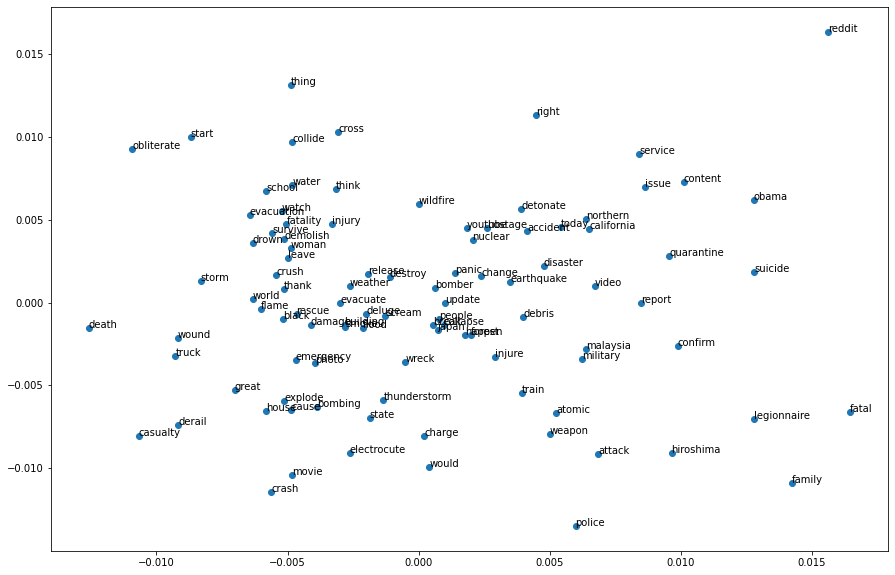

In [61]:
plt.figure(figsize=(15,10))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


## Skip Gram Model

![](https://media.geeksforgeeks.org/wp-content/uploads/skip_gram.png)

In [62]:
# Create Skip Gram model
model_sg = Word2Vec(corpus, min_count = 50, sg = 1)

In [63]:
print(model_sg)

Word2Vec(vocab=99, size=100, alpha=0.025)


In [64]:
# summarize vocabulary
words = list(model_sg.wv.vocab)
print(words)

['earthquake', 'forest', 'evacuation', 'people', 'wildfire', 'california', 'photo', 'smoke', 'school', 'update', 'flood', 'disaster', 'cause', 'emergency', 'happen', 'building', 'damage', 'crash', 'break', 'police', 'thank', 'leave', 'black', 'train', 'truck', 'accident', 'great', 'report', 'cross', 'injury', 'right', 'change', 'today', 'issue', 'scream', 'youtube', 'thing', 'debris', 'family', 'state', 'wreck', 'death', 'house', 'service', 'destroy', 'think', 'weather', 'world', 'attack', 'survive', 'watch', 'start', 'video', 'movie', 'storm', 'would', 'collapse', 'military', 'japan', 'charge', 'northern', 'nuclear', 'suicide', 'injure', 'obama', 'weapon', 'release', 'woman', 'atomic', 'flame', 'hostage', 'wound', 'drown', 'panic', 'hiroshima', 'bombing', 'rescue', 'explode', 'evacuate', 'confirm', 'content', 'water', 'casualty', 'collide', 'thunderstorm', 'fatal', 'crush', 'legionnaire', 'malaysia', 'deluge', 'demolish', 'derail', 'detonate', 'electrocute', 'reddit', 'fatality', 'obl

In [65]:
similar(model_sg, 'wildfire')

[('injure', 0.2637452781200409),
 ('deluge', 0.2570168077945709),
 ('japan', 0.24257026612758636),
 ('california', 0.22838909924030304),
 ('cause', 0.21655428409576416),
 ('military', 0.208485946059227),
 ('demolish', 0.20770804584026337),
 ('youtube', 0.20131933689117432),
 ('content', 0.20011478662490845),
 ('family', 0.19947192072868347)]

In [66]:
embedding(model_sg, 'wildfire')

array([ 2.5729991e-03, -2.9484178e-03,  2.8245708e-03,  2.2687726e-03,
        1.8685320e-03, -4.5641027e-03,  1.1692980e-03,  2.2117370e-03,
        1.2502965e-03,  2.9905203e-03, -1.0036544e-03,  1.7634637e-03,
       -1.6907695e-03,  5.3237844e-03,  2.0574189e-03, -2.4901468e-03,
       -4.2123427e-03, -2.2735239e-03,  1.1504990e-03, -1.9314595e-03,
       -1.9231035e-03,  3.1586410e-03, -6.3724804e-04, -5.6280983e-03,
        4.4069721e-04,  3.7022962e-03, -3.3838428e-03, -4.8533026e-03,
       -2.9679229e-03, -3.2342072e-03, -4.1892449e-03, -6.2227380e-05,
       -2.9224709e-03, -5.9197731e-03, -1.9053953e-03,  6.5379907e-05,
       -4.1823606e-03,  8.0365210e-04, -2.9792653e-03,  3.6000449e-03,
        2.8066158e-03, -5.0162007e-03,  3.2035012e-03, -1.3104540e-03,
       -4.3962877e-03,  2.9016219e-03, -8.0903247e-04, -3.5595791e-03,
       -4.8339791e-03, -3.1745988e-03,  5.3092814e-04,  2.4790149e-03,
       -1.7790883e-03, -4.3281047e-03, -3.3183761e-03,  1.7023660e-03,
      

In [67]:
similarity(model_sg, 'wildfire', "california")

0.22838916

In [68]:
X = model_sg[model_sg.wv.vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [69]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

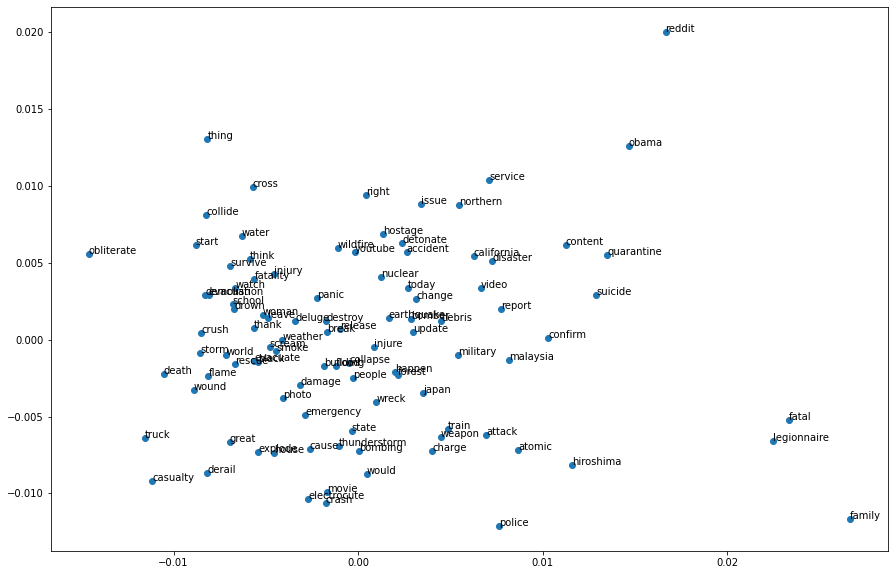

In [70]:
plt.figure(figsize=(15,10))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [71]:
# export data set
#from google.colab import files
#df_3.to_csv('df_train.csv')
#files.download('df_train.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>